In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
%load_ext autoreload
%autoreload 2

# Imports

In [0]:
from io import StringIO
import json
import re
import unicodedata

In [0]:
from collections import namedtuple
from collections import defaultdict

In [0]:
from IPython.display import Image

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as img

Couldn't import dot_parser, loading of dot files will not be possible.


In [0]:
import pandas as pd
import numpy as np

In [0]:
from bs4 import UnicodeDammit

In [0]:
import html2text

In [0]:
pd.options.display.max_rows = 999

In [0]:
import pydot

In [0]:
from stanford_corenlp_pywrapper import sockwrap

# CoreNLP

## Start Server

In [0]:
CORENLP_DIR = '/home/blannon/src/stanford-corenlp-full-2015-04-20'
CORENLP_VER = '3.5.2'

CORENLP_JARS = [
    '{d}/stanford-corenlp-{v}.jar'.format(d=CORENLP_DIR, v=CORENLP_VER),
    '{d}/stanford-corenlp-{v}-models.jar'.format(d=CORENLP_DIR, v=CORENLP_VER),
]

In [0]:
CORENLP_CONFIG = {
    'annotators': 'tokenize, ssplit, pos, lemma, ner, parse',
    'sutime.markTimeRanges': 'true',
    'sutime.includeRange': 'true',
    'ssplit.newlineIsSentenceBreak': 'two',
    'parse.flags': '-makeCopulaHead'
}

OUTPUT_TYPES = ['pos, lemmas, parse, deps_basic, deps_cc, ner, normner']

In [0]:
CORENLP_NN_CONFIG = {
    'annotators': 'tokenize, ssplit, pos, lemma, ner, depparse',
    'sutime.markTimeRanges': True,
    'sutime.includeRange': True,
    'ssplit.newlineIsSentenceBreak': 'two',
    'parse.flags': '-makeCopulaHead'
}

NN_OUTPUT_TYPES = ['pos, lemmas, deps_cc, ner, normner']

In [0]:
parser = sockwrap.SockWrap(
    mode=None,
    corenlp_jars=CORENLP_JARS,
    corenlp_dir=CORENLP_DIR,
    configdict=CORENLP_CONFIG,
    output_types=OUTPUT_TYPES
)

INFO:StanfordSocketWrap:Starting pipe subprocess, and waiting for signal it's ready, with command:  exec java -Xmx4g -cp '/home/blannon/src/stanford_corenlp_pywrapper/stanford_corenlp_pywrapper/lib/piperunner.jar:/home/blannon/src/stanford_corenlp_pywrapper/stanford_corenlp_pywrapper/lib/guava-13.0.1.jar:/home/blannon/src/stanford_corenlp_pywrapper/stanford_corenlp_pywrapper/lib/jackson-all-1.9.11.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/ejml-0.23.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/javax.json.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/joda-time.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/jollyday.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/protobuf.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2-javadoc.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2-models.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2.jar:/home/blannon/src/stan

goo!


In [0]:
nn_parser = sockwrap.SockWrap(
    mode=None,
    corenlp_jars=CORENLP_JARS,
    corenlp_dir=CORENLP_DIR,
    configdict=CORENLP_NN_CONFIG,
    output_types=NN_OUTPUT_TYPES
)

INFO:StanfordSocketWrap:Starting pipe subprocess, and waiting for signal it's ready, with command:  exec java -Xmx4g -cp '/home/blannon/src/stanford_corenlp_pywrapper/stanford_corenlp_pywrapper/lib/piperunner.jar:/home/blannon/src/stanford_corenlp_pywrapper/stanford_corenlp_pywrapper/lib/guava-13.0.1.jar:/home/blannon/src/stanford_corenlp_pywrapper/stanford_corenlp_pywrapper/lib/jackson-all-1.9.11.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/ejml-0.23.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/javax.json.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/joda-time.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/jollyday.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/protobuf.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2-javadoc.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2-models.jar:/home/blannon/src/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2.jar:/home/blannon/src/stan

goo!


In [0]:
#parser.kill_proc_if_running()

In [0]:
#nn_parser.kill_proc_if_running()

## Parse

In [0]:
test_text = "From 1981 to 1983, Vicki served as an assistant city representative at the National Center for Municipal Development."

In [0]:
parsed = parser.parse_doc(test_text)
sent = parsed['sentences'][0]

In [0]:
parsed

{u'sentences': [{u'char_offsets': [[0, 4],
    [5, 9],
    [10, 12],
    [13, 17],
    [17, 18],
    [19, 24],
    [25, 31],
    [32, 34],
    [35, 37],
    [38, 47],
    [48, 52],
    [53, 67],
    [68, 70],
    [71, 74],
    [75, 83],
    [84, 90],
    [91, 94],
    [95, 104],
    [105, 116],
    [116, 117]],
   u'deps_basic': [[u'root', -1, 6],
    [u'case', 3, 0],
    [u'nummod', 3, 1],
    [u'dep', 3, 2],
    [u'nmod', 6, 15],
    [u'nmod', 6, 3],
    [u'nsubj', 6, 5],
    [u'nmod', 6, 11],
    [u'case', 11, 7],
    [u'det', 11, 8],
    [u'amod', 11, 9],
    [u'compound', 11, 10],
    [u'nmod', 15, 18],
    [u'case', 15, 12],
    [u'det', 15, 13],
    [u'compound', 15, 14],
    [u'case', 18, 16],
    [u'compound', 18, 17]],
   u'deps_cc': [[u'root', -1, 6],
    [u'case', 3, 0],
    [u'nummod', 3, 1],
    [u'dep', 3, 2],
    [u'nmod:at', 6, 15],
    [u'nmod:from', 6, 3],
    [u'nsubj', 6, 5],
    [u'nmod:as', 6, 11],
    [u'case', 11, 7],
    [u'det', 11, 8],
    [u'amod', 11, 9],


# Utils

In [0]:
pdg = pydot.Dot()

In [0]:
pdg.write_dot?

In [0]:
TokenNode = namedtuple('TokenNode', ('index', 'token', 'pos', 'lemma', 'ner', 'char_offsets'))

In [0]:
def build_dep_graph(sent, dep_type='cc'):
    token_nodes = [TokenNode(i,t,p,l,n,tuple(o)) for i,t,p,l,n,o in zip(xrange(len(sent['tokens'])), sent['tokens'], sent['pos'],sent['lemmas'], sent['ner'], sent['char_offsets'])]    
    token_lookup = {i:t for i,t in enumerate(token_nodes)}
    #token_lookup[-1] = 'ROOT'
    dg = nx.DiGraph()
    for tn in token_nodes:
        dg.add_node(tn, label=tn.lemma, ner=tn.ner, pos=tn.pos)
    sorted_deps = sorted(sent['deps_'+dep_type], key=lambda x: x[0])
    for rel, lix, rix in sorted_deps:
        try:
            lnode = token_lookup[lix]
            rnode = token_lookup[rix]
            dg.add_edge(lnode, rnode, label=rel.replace(':','_'))
        except KeyError:
            continue
    for e in dg.selfloop_edges():
        dg.remove_edge(*e)
    return dg

In [0]:
def display_parse(dep_graph, filename):
    pdg = pydot.Dot()
    for u,v in dep_graph.edges():
        ulabel = '{lemma}-{index}'.format(**u.__dict__)
        vlabel = '{lemma}-{index}'.format(**v.__dict__)
        pdg.add_edge(pydot.Edge(ulabel,vlabel,**dep_graph.edge[u][v]))
    pdg.write_png('images/{fn}.png'.format(fn=filename), prog='dot')
    pdg.write_dot('images/{fn}.dot'.format(fn=filename), prog='dot')

In [0]:
def subtree_to_string(head, dg):
    others = [d for d in nx.algorithms.descendants(dg, head) if dg[head].get(d,{'label':''})['label'] != 'case'] 
    linearized = sorted([head,] + others, key=lambda x: x.index)
    return ' '.join([t.token for t in linearized])

In [0]:
def simple_pas(predicate, dg):
    arguments = dg[predicate]
    _pas = defaultdict(list)
    for arg, rel in arguments.items():
        _pas[rel['label']].append(subtree_to_string(arg, dg))
    _pas[u'predicate'] = predicate.token
    return dict(_pas)

In [0]:
def collect_all_predicates(dg):
    predicates = [n for n in nx.topological_sort_recursive(dg) if n.pos.startswith('V')]
    return [simple_pas(p, dg) for p in predicates]

# Build DAG

In [0]:
parsed = parser.parse_doc(test_text)

In [0]:
mydg = build_dep_graph(parsed['sentences'][0])

In [0]:
ner_nodes = [n for n in mydg.nodes() if n.ner != 'O']

In [0]:
sorted(ner_nodes, key=lambda x: x.index)

[TokenNode(index=1, token=u'1981', pos=u'CD', lemma=u'1981', ner=u'DATE', char_offsets=(5, 9)),
 TokenNode(index=3, token=u'1983', pos=u'CD', lemma=u'1983', ner=u'DATE', char_offsets=(13, 17)),
 TokenNode(index=5, token=u'Vicki', pos=u'NNP', lemma=u'Vicki', ner=u'PERSON', char_offsets=(19, 24)),
 TokenNode(index=14, token=u'National', pos=u'NNP', lemma=u'National', ner=u'ORGANIZATION', char_offsets=(75, 83)),
 TokenNode(index=15, token=u'Center', pos=u'NNP', lemma=u'Center', ner=u'ORGANIZATION', char_offsets=(84, 90)),
 TokenNode(index=16, token=u'for', pos=u'IN', lemma=u'for', ner=u'ORGANIZATION', char_offsets=(91, 94)),
 TokenNode(index=17, token=u'Municipal', pos=u'NNP', lemma=u'Municipal', ner=u'ORGANIZATION', char_offsets=(95, 104)),
 TokenNode(index=18, token=u'Development', pos=u'NNP', lemma=u'Development', ner=u'ORGANIZATION', char_offsets=(105, 116))]

In [0]:
mydg.edges(nbunch=ner_nodes,data=True)

[(TokenNode(index=3, token=u'1983', pos=u'CD', lemma=u'1983', ner=u'DATE', char_offsets=(13, 17)),
  TokenNode(index=0, token=u'From', pos=u'IN', lemma=u'from', ner=u'O', char_offsets=(0, 4)),
  {'label': u'case'}),
 (TokenNode(index=3, token=u'1983', pos=u'CD', lemma=u'1983', ner=u'DATE', char_offsets=(13, 17)),
  TokenNode(index=1, token=u'1981', pos=u'CD', lemma=u'1981', ner=u'DATE', char_offsets=(5, 9)),
  {'label': u'nummod'}),
 (TokenNode(index=3, token=u'1983', pos=u'CD', lemma=u'1983', ner=u'DATE', char_offsets=(13, 17)),
  TokenNode(index=2, token=u'to', pos=u'TO', lemma=u'to', ner=u'O', char_offsets=(10, 12)),
  {'label': u'dep'}),
 (TokenNode(index=18, token=u'Development', pos=u'NNP', lemma=u'Development', ner=u'ORGANIZATION', char_offsets=(105, 116)),
  TokenNode(index=16, token=u'for', pos=u'IN', lemma=u'for', ner=u'ORGANIZATION', char_offsets=(91, 94)),
  {'label': u'case'}),
 (TokenNode(index=18, token=u'Development', pos=u'NNP', lemma=u'Development', ner=u'ORGANIZATION

# Display a parse

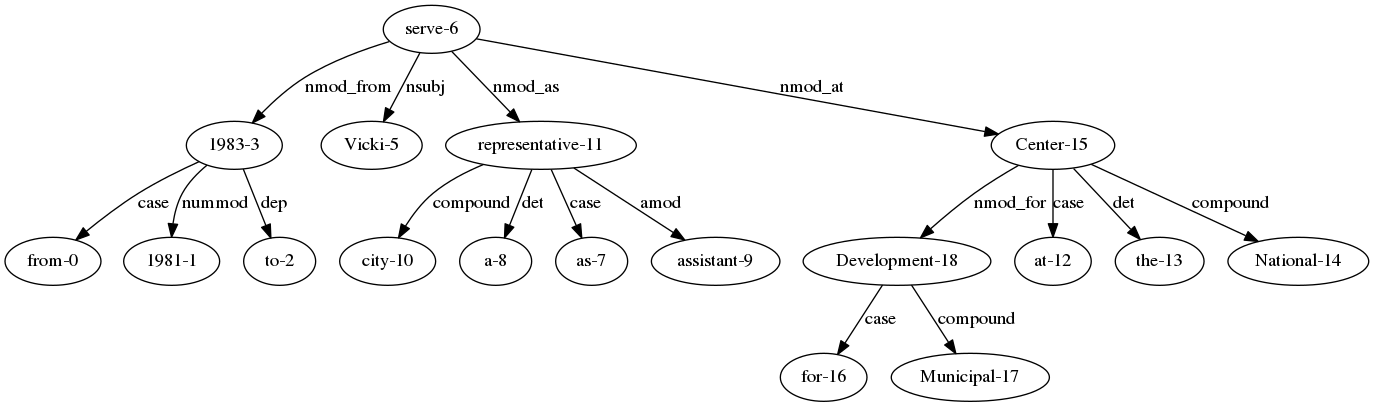

In [0]:
display_parse(build_dep_graph(parsed['sentences'][0]), 'test')
Image('images/test.png')

# Examples

In [0]:
simple = "From 1981 to 1983, Vicki served as an assistant city representative at the National Center for Municipal Development."
copula = "She was the assistant to the executive director of the Democratic Study Group in the US House of Representatives from 1979 to 1981."
twoverb = "Vicki has also served as a government relations consultant, representing the interests of Portland, Oregon in Washington DC."
smallclause = "The Department of Agriculture had appointed Vicki president"
relclause_subj = "The clients whom Vicki has represented include Coca-Cola, Texaco, and Giant Foods."
subclause = "Vicki lobbied for health insurance companies that supported Obamacare"
passive = "Giant is represented by Victoria Cram as of June 3, 2006."

In [0]:
print ' '.join([simple, copula])

From 1981 to 1983, Vicki served as an assistant city representative at the National Center for Municipal Development. She was the assistant to the executive director of the Democratic Study Group in the US House of Representatives from 1979 to 1981.


# PCFG

## simple

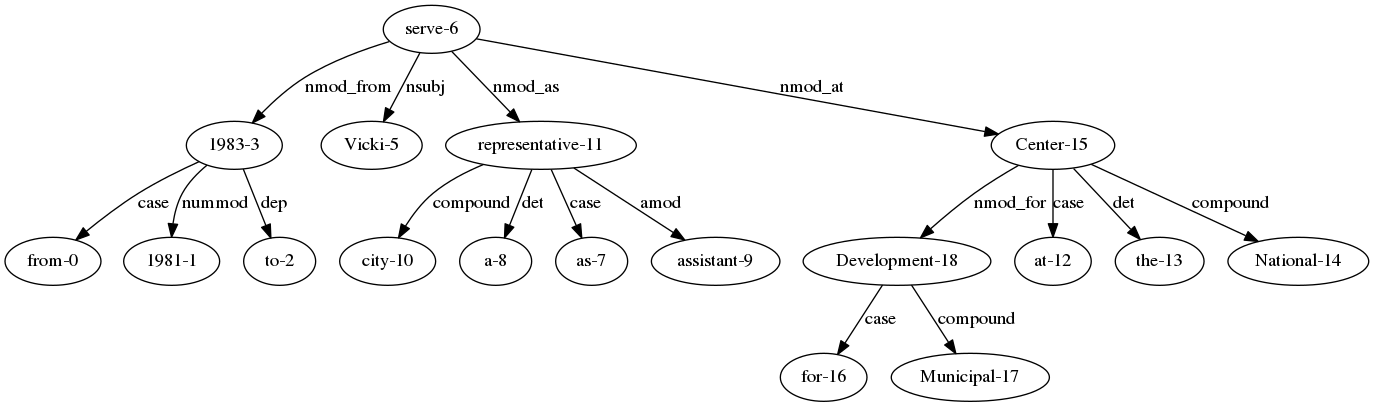

In [0]:
simple_parse = parser.parse_doc(simple)
simple_dg_cc = build_dep_graph(simple_parse['sentences'][0])
display_parse(simple_dg_cc, 'pcfg-simple')
Image('images/pcfg-simple.png')

In [0]:
collect_all_predicates(simple_dg_cc)

[{u'nmod_as': [u'an assistant city representative'],
  u'nmod_at': [u'the National Center for Municipal Development'],
  u'nmod_from': [u'1981 to 1983'],
  u'nsubj': [u'Vicki'],
  u'predicate': u'served'}]

In [0]:
tn = simple_dg_cc.nodes()[0]

In [0]:
pd.DataFrame.from_records(simple_dg_cc.nodes(), columns=simple_dg_cc.nodes()[0].__dict__.keys()).sort('index')

,index,token,pos,lemma,ner,char_offsets
4,0,From,IN,from,O,"(0, 4)"
1,1,1981,CD,1981,DATE,"(5, 9)"
9,2,to,TO,to,O,"(10, 12)"
2,3,1983,CD,1983,DATE,"(13, 17)"
5,4,",",",",",",O,"(17, 18)"
3,5,Vicki,NNP,Vicki,PERSON,"(19, 24)"
7,6,served,VBD,serve,O,"(25, 31)"
15,7,as,IN,as,O,"(32, 34)"
16,8,an,DT,a,O,"(35, 37)"
8,9,assistant,JJ,assistant,O,"(38, 47)"


In [0]:
tn.__dict__.keys()
tn.__dict__

OrderedDict([('index', 19), ('token', u'.'), ('pos', u'.'), ('lemma', u'.'), ('ner', u'O'), ('char_offsets', (116, 117))])

## copula

Note: "1979 - 1981" got parsed wrong!

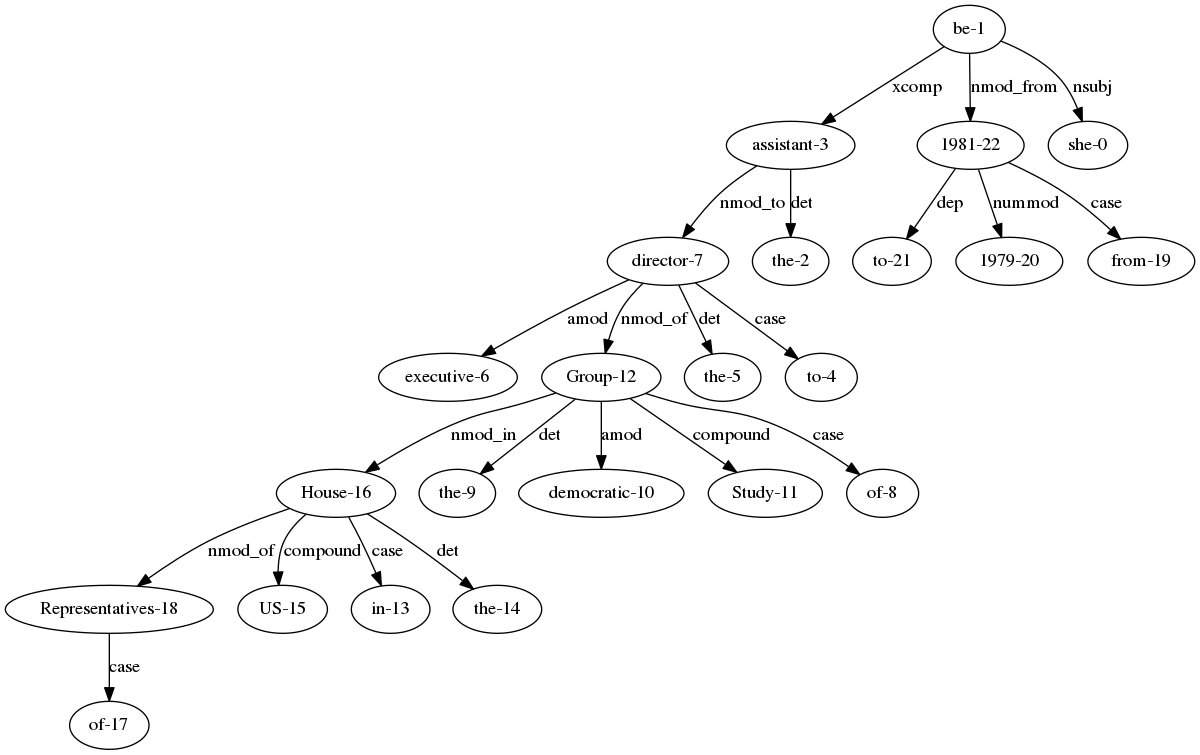

In [0]:
copula_parse = parser.parse_doc(copula)
copula_dg_cc = build_dep_graph(copula_parse['sentences'][0])
display_parse(copula_dg_cc, 'pcfg-copula')
Image('images/pcfg-copula.png')

In [0]:
collect_all_predicates(copula_dg_cc)

[{u'nmod_from': [u'1979 to 1981'],
  u'nsubj': [u'She'],
  u'predicate': u'was',
  u'xcomp': [u'the assistant to the executive director of the Democratic Study Group in the US House of Representatives']}]

## twoverb

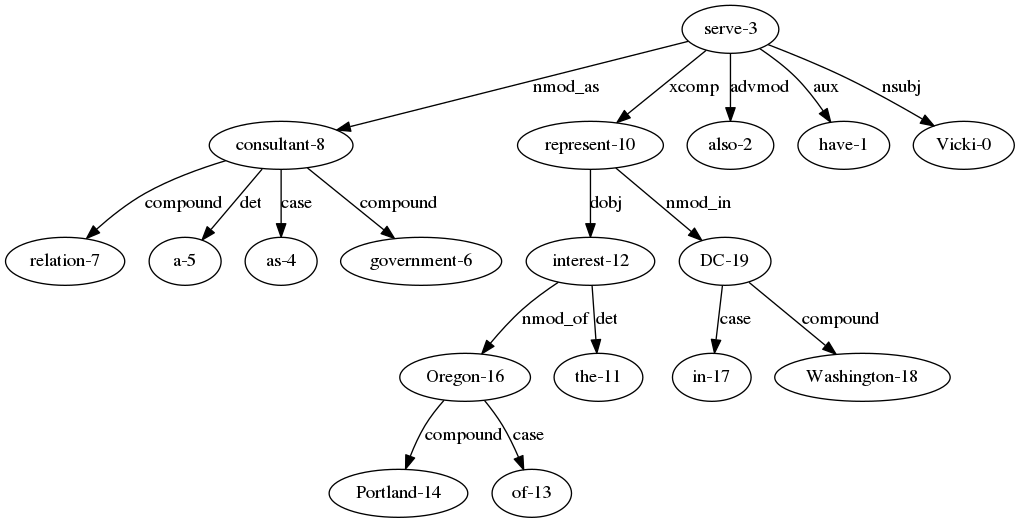

In [0]:
twoverb_parse = parser.parse_doc(twoverb)
twoverb_dg_cc = build_dep_graph(twoverb_parse['sentences'][0])
display_parse(twoverb_dg_cc, 'pcfg-twoverb')
Image('images/pcfg-twoverb.png')

In [0]:
collect_all_predicates(twoverb_dg_cc)

[{u'advmod': [u'also'],
  u'aux': [u'has'],
  u'nmod_as': [u'a government relations consultant'],
  u'nsubj': [u'Vicki'],
  u'predicate': u'served',
  u'xcomp': [u'representing the interests of Portland Oregon in Washington DC']},
 {u'dobj': [u'the interests of Portland Oregon'],
  u'nmod_in': [u'Washington DC'],
  u'predicate': u'representing'},
 {u'predicate': u'has'}]

## smallclause

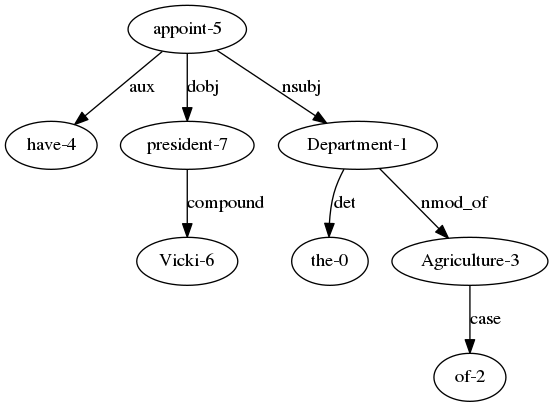

In [0]:
smallclause_parse = parser.parse_doc(smallclause)
smallclause_dg_cc = build_dep_graph(smallclause_parse['sentences'][0])
display_parse(smallclause_dg_cc, 'pcfg-smallclause')
Image('images/pcfg-smallclause.png')

In [0]:
collect_all_predicates(smallclause_dg_cc)

[{u'aux': [u'had'],
  u'dobj': [u'Vicki president'],
  u'nsubj': [u'The Department of Agriculture'],
  u'predicate': u'appointed'},
 {u'predicate': u'had'}]

## relclause

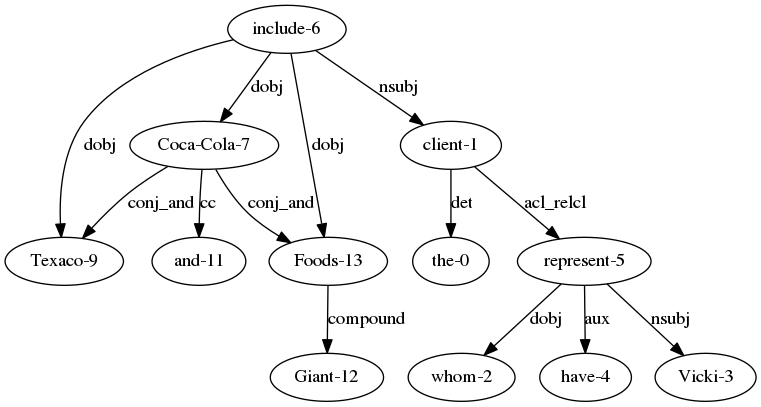

In [0]:
relclause_parse = parser.parse_doc(relclause_subj)
relclause_dg_cc = build_dep_graph(relclause_parse['sentences'][0])
display_parse(relclause_dg_cc, 'pcfg-relclause')
Image('images/pcfg-relclause.png')

In [0]:
nx.algorithms.traversal.bfs_successors

<function networkx.algorithms.traversal.breadth_first_search.bfs_successors>

In [0]:
collect_all_predicates(relclause_dg_cc)

[{u'dobj': [u'Texaco', u'Coca-Cola Texaco and Giant Foods', u'Giant Foods'],
  u'nsubj': [u'The clients whom Vicki has represented'],
  u'predicate': u'include'},
 {u'aux': [u'has'],
  u'dobj': [u'whom'],
  u'nsubj': [u'Vicki'],
  u'predicate': u'represented'},
 {u'predicate': u'has'}]

## subclause

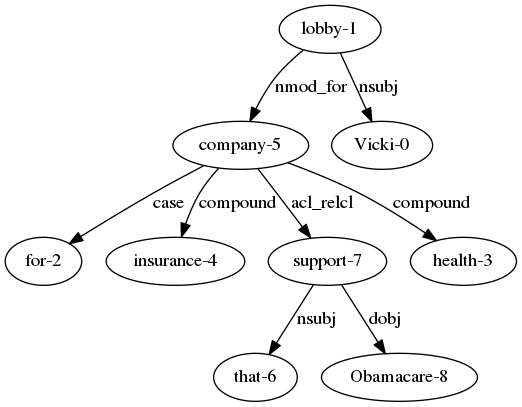

In [0]:
subclause_parse = parser.parse_doc(subclause)
subclause_dg_cc = build_dep_graph(subclause_parse['sentences'][0])
display_parse(subclause_dg_cc, 'pcfg-subclause')
Image('images/pcfg-subclause.png')

In [0]:
collect_all_predicates(subclause_dg_cc)

[{u'nmod_for': [u'health insurance companies that supported Obamacare'],
  u'nsubj': [u'Vicki'],
  u'predicate': u'lobbied'},
 {u'dobj': [u'Obamacare'], u'nsubj': [u'that'], u'predicate': u'supported'}]

## passive

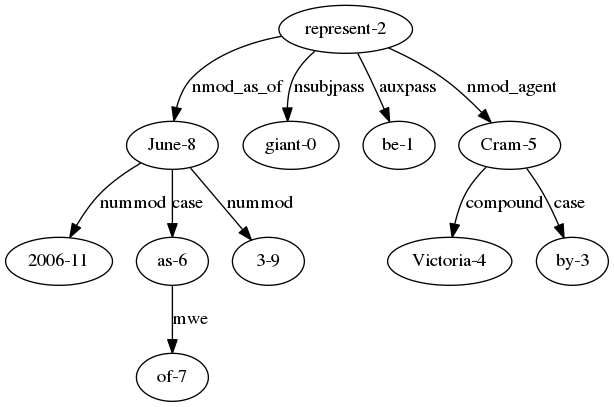

In [0]:
passive_parse = parser.parse_doc(passive)
passive_dg_cc = build_dep_graph(passive_parse['sentences'][0])
display_parse(passive_dg_cc, 'pcfg-passive')
Image('images/pcfg-passive.png')

In [0]:
collect_all_predicates(passive_dg_cc)

[{u'auxpass': [u'is'],
  u'nmod_agent': [u'Victoria Cram'],
  u'nmod_as_of': [u'of June 3 2006'],
  u'nsubjpass': [u'Giant'],
  u'predicate': u'represented'},
 {u'predicate': u'is'}]

In [0]:
nx.topological_sort(simple_dg_cc)

[TokenNode(index=6, token=u'served', pos=u'VBD', lemma=u'serve', ner=u'O', char_offsets=(25, 31)),
 TokenNode(index=11, token=u'representative', pos=u'NN', lemma=u'representative', ner=u'O', char_offsets=(53, 67)),
 TokenNode(index=10, token=u'city', pos=u'NN', lemma=u'city', ner=u'O', char_offsets=(48, 52)),
 TokenNode(index=8, token=u'an', pos=u'DT', lemma=u'a', ner=u'O', char_offsets=(35, 37)),
 TokenNode(index=7, token=u'as', pos=u'IN', lemma=u'as', ner=u'O', char_offsets=(32, 34)),
 TokenNode(index=9, token=u'assistant', pos=u'JJ', lemma=u'assistant', ner=u'O', char_offsets=(38, 47)),
 TokenNode(index=15, token=u'Center', pos=u'NNP', lemma=u'Center', ner=u'ORGANIZATION', char_offsets=(84, 90)),
 TokenNode(index=13, token=u'the', pos=u'DT', lemma=u'the', ner=u'O', char_offsets=(71, 74)),
 TokenNode(index=14, token=u'National', pos=u'NNP', lemma=u'National', ner=u'ORGANIZATION', char_offsets=(75, 83)),
 TokenNode(index=18, token=u'Development', pos=u'NNP', lemma=u'Development', ner=

In [0]:
nx.topological_sort_recursive(simple_dg_cc)

[TokenNode(index=6, token=u'served', pos=u'VBD', lemma=u'serve', ner=u'O', char_offsets=(25, 31)),
 TokenNode(index=15, token=u'Center', pos=u'NNP', lemma=u'Center', ner=u'ORGANIZATION', char_offsets=(84, 90)),
 TokenNode(index=18, token=u'Development', pos=u'NNP', lemma=u'Development', ner=u'ORGANIZATION', char_offsets=(105, 116)),
 TokenNode(index=17, token=u'Municipal', pos=u'NNP', lemma=u'Municipal', ner=u'ORGANIZATION', char_offsets=(95, 104)),
 TokenNode(index=16, token=u'for', pos=u'IN', lemma=u'for', ner=u'ORGANIZATION', char_offsets=(91, 94)),
 TokenNode(index=14, token=u'National', pos=u'NNP', lemma=u'National', ner=u'ORGANIZATION', char_offsets=(75, 83)),
 TokenNode(index=13, token=u'the', pos=u'DT', lemma=u'the', ner=u'O', char_offsets=(71, 74)),
 TokenNode(index=11, token=u'representative', pos=u'NN', lemma=u'representative', ner=u'O', char_offsets=(53, 67)),
 TokenNode(index=9, token=u'assistant', pos=u'JJ', lemma=u'assistant', ner=u'O', char_offsets=(38, 47)),
 TokenNode

In [0]:
nx.topological_sort(twoverb_dg_cc)

[TokenNode(index=3, token=u'served', pos=u'VBN', lemma=u'serve', ner=u'O', char_offsets=(15, 21)),
 TokenNode(index=10, token=u'representing', pos=u'VBG', lemma=u'represent', ner=u'O', char_offsets=(60, 72)),
 TokenNode(index=8, token=u'consultant', pos=u'NN', lemma=u'consultant', ner=u'O', char_offsets=(48, 58)),
 TokenNode(index=9, token=u',', pos=u',', lemma=u',', ner=u'O', char_offsets=(58, 59)),
 TokenNode(index=19, token=u'DC', pos=u'NNP', lemma=u'DC', ner=u'LOCATION', char_offsets=(121, 123)),
 TokenNode(index=18, token=u'Washington', pos=u'NNP', lemma=u'Washington', ner=u'LOCATION', char_offsets=(110, 120)),
 TokenNode(index=20, token=u'.', pos=u'.', lemma=u'.', ner=u'O', char_offsets=(123, 124)),
 TokenNode(index=15, token=u',', pos=u',', lemma=u',', ner=u'O', char_offsets=(98, 99)),
 TokenNode(index=7, token=u'relations', pos=u'NNS', lemma=u'relation', ner=u'O', char_offsets=(38, 47)),
 TokenNode(index=0, token=u'Vicki', pos=u'NNP', lemma=u'Vicki', ner=u'PERSON', char_offsets

In [0]:
nx.topological_sort_recursive(twoverb_dg_cc)

[TokenNode(index=3, token=u'served', pos=u'VBN', lemma=u'serve', ner=u'O', char_offsets=(15, 21)),
 TokenNode(index=10, token=u'representing', pos=u'VBG', lemma=u'represent', ner=u'O', char_offsets=(60, 72)),
 TokenNode(index=8, token=u'consultant', pos=u'NN', lemma=u'consultant', ner=u'O', char_offsets=(48, 58)),
 TokenNode(index=9, token=u',', pos=u',', lemma=u',', ner=u'O', char_offsets=(58, 59)),
 TokenNode(index=19, token=u'DC', pos=u'NNP', lemma=u'DC', ner=u'LOCATION', char_offsets=(121, 123)),
 TokenNode(index=18, token=u'Washington', pos=u'NNP', lemma=u'Washington', ner=u'LOCATION', char_offsets=(110, 120)),
 TokenNode(index=20, token=u'.', pos=u'.', lemma=u'.', ner=u'O', char_offsets=(123, 124)),
 TokenNode(index=15, token=u',', pos=u',', lemma=u',', ner=u'O', char_offsets=(98, 99)),
 TokenNode(index=7, token=u'relations', pos=u'NNS', lemma=u'relation', ner=u'O', char_offsets=(38, 47)),
 TokenNode(index=0, token=u'Vicki', pos=u'NNP', lemma=u'Vicki', ner=u'PERSON', char_offsets

# Test data

In [0]:
h2t = html2text.HTML2Text()

In [0]:
h2t.body_width = 0
h2t.unicode_snob = 1
h2t.emphasis_mark = ''

In [0]:
def asciify(bio):
    asciitext = re.sub(r'[Aa]\?\?', ' ', unicodedata.normalize('NFD', bio).encode('ascii','replace'))
    return asciitext

def filter_lists(asciitext):
    for l in re.split(r'(\r\n|\n)', asciitext):
        lstrip = l.strip()
        if len(lstrip) > 0:
            if lstrip[0] not in ['*','-']:
                yield l

def clean_bio(bio):
    text = h2t.handle(bio)
    return '\n'.join([l for l in filter_lists(text)])
        

In [0]:
manatt_data = json.load(open('data/manatt-out-html-full.json'))

In [0]:
manatt_data[0]

{u'bio': [u'<div id="profile-education"><strong>Education</strong><br/><education>&#13;\n  <p>University of San Diego School of Law, J.D., May 1994<br/>Appellate Moot Court Board, National Team Member</p>&#13;\n  <p class="resumetext">&#160;</p>&#13;\n  <p class="resumetext">University of California at San Diego, B.A., cum laude<em>,</em>&#160;in political science with distinction, December 1990</p>&#13;\n</education></div>',
  u'<div id="ctl00_MainContent_DropZone1_columnDisplay_ctl00_controlcolumn_ctl00_WidgetHost_WidgetHost_widget_admissions">&#13;\n                    <strong>Bar Admissions</strong><br/>&#13;\n                    <span id="ctl00_MainContent_DropZone1_columnDisplay_ctl00_controlcolumn_ctl00_WidgetHost_WidgetHost_widget_lblbarAdmissions"><baradmissions>California</baradmissions></span>&#13;\n                </div>&#13;',
  u'<professionalexperience><p class="resumetext">Jack&#160;Yeh is a trial lawyer whose practice encompasses a wide range of complex commercial liti

In [0]:
s = manatt_data[0]['bio'][2]

In [0]:
h2t.handle(s)

u'Jack\xa0Yeh is a trial lawyer whose practice encompasses a wide range of complex commercial litigation matters, including competitive business litigation, unfair competition, government litigation, land use, intellectual property, entertainment, and other general business contract and tort claims.\xa0Mr. Yeh represents both publicly traded companies and emerging businesses in the advertising, entertainment and media, energy, real estate and technology industries.\n\nMr. Yeh has been publicly recognized by the National Asian Pacific American Bar Association, which named him one of 25 of the nation\u2019s \u201cBest Lawyers Under 40; by Los Angeles Magazine, which, on multiple occasions, has accorded him its prestigious \u201cSouthern California Superlawyer\u201d designation; and by LawDragon.com, a national portal listing of lawyers, which named him to its 500 New Stars, New Worlds list.\n\nRepresenting his clients in federal and state courts throughout the country, Mr. Yeh has amasse

In [0]:
h2t.handle(manatt_data[0]['bio'][0]).strip()

u'**Education**  \n\n\nUniversity of San Diego School of Law, J.D., May 1994  \nAppellate Moot Court Board, National Team Member\n\n\xa0\n\nUniversity of California at San Diego, B.A., cum laude,\xa0in political science with distinction, December 1990'

In [0]:
def parse_to_predicates(
     for sent in _parsed['sentences']:
        _dg = build_dep_graph(sent)
        try:
        for pas in collect_all_predicates(_dg):
            yield pas

SyntaxError: invalid syntax (<ipython-input-69-83f07a1bda79>, line 2)

In [0]:
def bio_to_parses(bio):
    parses = []
    for text in bio:
        for sent in parser.parse_doc(clean_bio(text))['sentences']:
            parses.append(sent)
    return parses

def process_data(d):
    d['parses'] = bio_to_parses(d['bio'])
    d['name'] = h2t.handle(d['name'][0])
    return d

In [0]:
%time processed = [process_data(d) for d in manatt_data[0:1]]

In [0]:
processed[0]

In [0]:
manatt_data[0]['bio'][-1]

In [0]:
p = nn_parser.parse_doc(clean_bio(manatt_data[0]['bio'][-1]))

In [0]:
display_parse(build_dep_graph(p['sentences'][-2]),'test2')
Image('images/test2.png')

In [0]:
all_preds = [collect_all_predicates(build_dep_graph(p)) for p in processed[0]['parses']]

In [0]:
all_preds

In [0]:
display_parse(build_dep_graph(processed[0]['parses'][-2]), 'test')
Image('images/test.png')

In [0]:
dg = build_dep_graph(p['sentences'][-2])

In [0]:
pd.DataFrame.from_records(dg.nodes(), columns=dg.nodes()[0].__dict__.keys()).sort('index')

In [0]:
collect_all_predicates(dg)